In [1]:
%matplotlib inline
import pandas as pd

In [2]:
import os
os.chdir('C:\\Users\\babsab\\Google Drive\\Courses\\Springboard\\Project\\Cap1\\data')

In [3]:
# read company financial data
fin_data = pd.read_csv('na_enterprize.csv', sep = ',', header = 0)

C:\Users\babsab\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fin_data.head(3)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,ni_fn,re_fn,sale_fn,xint_fn,addzip,city,dlrsn,fyrc,state,dldte
0,1004,19950531,1994.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,NaN,NaN,NaN,NaN,60191,Wood Dale,NaN,5,IL,NaN
1,1004,19960531,1995.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,NaN,NaN,NaN,NaN,60191,Wood Dale,NaN,5,IL,NaN
2,1004,19970531,1996.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,NaN,NaN,NaN,NaN,60191,Wood Dale,NaN,5,IL,NaN


In [5]:
# filter the last decade sme data
fin_data_dec1 = fin_data[(fin_data['fyear'] > 2002) & (fin_data['fyear'] < 2015) & (fin_data['fic'] == 'USA') \
                        & (fin_data['curcd'] == 'USD')]
fin_data_dec1['fyear'].unique()

array([ 2003.,  2004.,  2005.,  2006.,  2007.,  2008.,  2009.,  2010.,
        2011.,  2012.,  2013.,  2014.])

In [6]:
fin_data_dec1.tail()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,ni_fn,re_fn,sale_fn,xint_fn,addzip,city,dlrsn,fyrc,state,dldte
233370,311524,20131231,2013.0,INDL,C,D,STD,TAM,TAMINCO CORP,USD,...,GP,NaN,NaN,QA,18195,Allentown,1.0,12,PA,20141208.0
233389,315318,20111231,2011.0,INDL,C,D,STD,PAH,PLATFORM SPECIALTY PRODUCTS,USD,...,NaN,NaN,NaN,NaN,33401,West Palm Beach,NaN,12,FL,NaN
233390,315318,20121231,2012.0,INDL,C,D,STD,PAH,PLATFORM SPECIALTY PRODUCTS,USD,...,NaN,NaN,AA,QA,33401,West Palm Beach,NaN,12,FL,NaN
233391,315318,20131231,2013.0,INDL,C,D,STD,PAH,PLATFORM SPECIALTY PRODUCTS,USD,...,NaN,NaN,AA,NaN,33401,West Palm Beach,NaN,12,FL,NaN
233392,315318,20141231,2014.0,INDL,C,D,STD,PAH,PLATFORM SPECIALTY PRODUCTS,USD,...,NaN,NaN,AA,NaN,33401,West Palm Beach,NaN,12,FL,NaN


In [7]:
# filter the data for bankrupt enterprizes
bkrpt_ent_data = fin_data_dec1[fin_data['dlrsn'] == 2]

C:\Users\babsab\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [8]:
# create a list of bankrupt enterprizes
bkrpt_ent = bkrpt_ent_data[['tic', 'conm', 'fyear', 'dlrsn', 'dldte']]
bkrpt_ent.columns = ['ticker', 'name', 'fin_year', 'dlrsn', 'bkrpt_date']
bkrpt_ent = bkrpt_ent.drop_duplicates(subset = ['ticker', 'name'], keep = 'last')
bkrpt_ent = bkrpt_ent.sort_values(by = 'bkrpt_date')
bkrpt_ent = bkrpt_ent.set_index('ticker').reset_index()
bkrpt_ent = bkrpt_ent.drop(['fin_year', 'dlrsn'], 1)
bkrpt_ent.head()

,ticker,name,bkrpt_date
0,KYC.,KEYSTONE CAMERA PRODUCTS,19920331.0
1,3HDTV.,HI-DEF ENTERPRISE INC,19930331.0
2,NAMS,NAMSCO CORP,19940331.0
3,3SCRD,SCIENTIFIC RADIO SYSTEMS INC,19950930.0
4,REDL,REDLINE PERFORMANCE PRODS,20040827.0


In [9]:
def conv(x):
    return pd.Period(year = x // 10000, month = x//100 % 100, day = x%100, freq='D')

bkrpt_ent['bkrpt_date'] = bkrpt_ent['bkrpt_date'].apply(conv)

In [10]:
# filter the enterprizes that defaulted during or after 2011
year = 2009
bkrpt_ent = bkrpt_ent[bkrpt_ent['bkrpt_date'] > pd.Period(year = year, month = 1, day = 1, freq='D')]
print "Total enterprizes defaulted during or after", year, " : ", len(bkrpt_ent)
bkrpt_ent.tail()

Total enterprizes defaulted during or after 2009  :  87


,ticker,name,bkrpt_date
91,FWMHQ,FAIRWAY GROUP HOLDINGS,2016-07-07
92,ANRZQ,ALPHA NATURAL RESOURCES INC,2016-07-28
93,DXMMQ,DEX MEDIA INC,2016-08-01
94,SMXIQ,SEBRING SOFTWARE INC,2016-08-15
95,KWKAQ,QUICKSILVER RESOURCES INC,2016-09-01


In [11]:
# keep only the above enterprizes in the last decade default data
# merge bkrpt_ent_data with the bkrpt_ent on ticker, lh = later half
bkrpt_lh = bkrpt_ent_data.merge(bkrpt_ent, how='right', left_on='tic', right_on='ticker')
bkrpt_lh = bkrpt_lh.drop(['ticker', 'name', 'bkrpt_date'], 1)
bkrpt_lh.head(3)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,ni_fn,re_fn,sale_fn,xint_fn,addzip,city,dlrsn,fyrc,state,dldte
0,1367,20030630,2003.0,INDL,C,D,STD,3AMBEQ,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0
1,1367,20040630,2004.0,INDL,C,D,STD,3AMBEQ,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0
2,1367,20050630,2005.0,INDL,C,D,STD,3AMBEQ,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0


In [12]:
# filter the data for non-defaulting enterprizes
nd_ent = fin_data_dec1[fin_data['dlrsn'] != 2]
nd_ent.shape

C:\Users\babsab\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(98016, 44)

In [13]:
# concat the default and non-default data
dec1 = pd.concat([bkrpt_lh, nd_ent])
dec1.shape

(98616, 44)

In [14]:
# add default column
dec1.ix[dec1['dlrsn']==2,'default'] = 1;
dec1.ix[dec1['dlrsn']!=2,'default'] = 0;
dec1.shape

(98616, 45)

In [15]:
fcwise = dec1.set_index('tic', 'fyear').reset_index()
fcwise.head(3)

,tic,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,...,re_fn,sale_fn,xint_fn,addzip,city,dlrsn,fyrc,state,dldte,default
0,3AMBEQ,1367,20030630,2003.0,INDL,C,D,STD,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0,1.0
1,3AMBEQ,1367,20040630,2004.0,INDL,C,D,STD,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0,1.0
2,3AMBEQ,1367,20050630,2005.0,INDL,C,D,STD,AMBER RESOURCES CO OF COLO,USD,...,NaN,NaN,NaN,80202,Denver,2.0,12,CO,20120831.0,1.0


In [16]:
# filter small and medium enterprizes - those with average sale less than $65M
avg_sale = fcwise[['tic', 'conm', 'sale']].groupby('tic').mean()
sme_sales = avg_sale[avg_sale['sale'] <= 65]
sme_sales = sme_sales.reset_index()
len(sme_sales)

5482

In [17]:
# keep only the sme data in sme_data
sme_data = fcwise.merge(sme_sales, how='right', left_on='tic', right_on='tic')
sme_data = sme_data.drop('sale_y', 1)
sme_data.shape

(32213, 45)

In [18]:
fdd1 = sme_data[['fyear', 'tic', 'default']].groupby(['fyear', 'default'])['tic'].count().reset_index()
fdd1 = fdd1.set_index(['fyear', 'default'])
fdd1 = fdd1.unstack('default')
fdd1.columns = fdd1.columns.droplevel(0)
fdd1['ratio'] = fdd1.iloc[:,0] / fdd1.iloc[:,1]
fdd1.head()

default,0.0,1.0,ratio
fyear,,,
2003.0,3168,23,137.739130
2004.0,3010,26,115.769231
2005.0,2873,27,106.407407
2006.0,2798,27,103.629630
2007.0,2684,27,99.407407


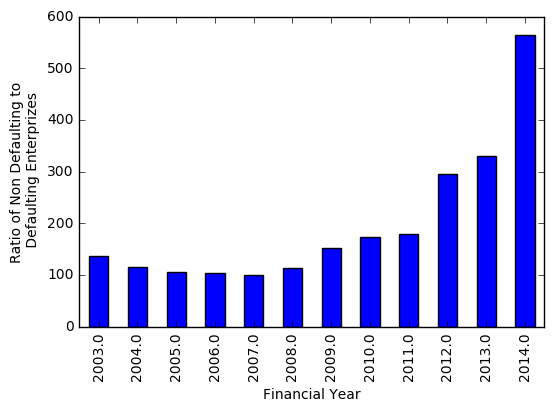

In [19]:
ax = fdd1['ratio'].plot(kind='bar')
ax.set_ylabel('Ratio of Non Defaulting to\n Defaulting Enterprizes')
ax.set_xlabel('Financial Year')

In [20]:
# drop not needed columns
sme_data = sme_data.drop(['consol', 'popsrc', 'datafmt', 'ap_fn', 'at_fn', 'ni_fn', 're_fn', 'sale_fn', 'xint_fn'], 1)

In [21]:
sme_d = sme_data[sme_data['default']==1]
sme_nd = sme_data[sme_data['default']==0]

In [22]:
# now, we have three data sets
# 1. sme_data - all enterprizes data
# 2. sme_d - defaulting enterprizes data
# 3. sme_nd - non-defaulting enterprizes data

print 'shape of sme_data', sme_data.shape
print 'shape of sme_d', sme_d.shape
print 'shape of sme_nd', sme_nd.shape

shape of sme_data (32213, 36)
shape of sme_d (217, 36)
shape of sme_nd (31996, 36)


In [23]:
sme_d_pts = sme_d.groupby('tic').count().reset_index()
sme_d_pts.iloc[:,8:27].head()

,ap,at,ceq,ceql,ch,ebit,ebitda,intan,lt,ni,re,recd,rect,rectr,sale_x,seq,teq,wcap,xint
0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1,3,3,3,3,3,3,3,3,3,3,3,1,3,3,3,3,0,3,3
2,6,6,6,6,6,6,6,6,6,6,6,1,6,6,6,6,0,6,5
3,6,6,6,6,6,6,6,6,6,6,6,1,6,6,6,6,0,6,6
4,12,12,12,12,12,12,12,11,12,12,12,12,12,12,12,12,7,12,12


In [24]:
sme_d_pts.mean()[7:26]

ap        6.966667
at        6.966667
ceq       6.966667
ceql      6.900000
ch        6.933333
ebit      6.966667
ebitda    6.966667
intan     6.900000
lt        6.966667
ni        6.966667
re        6.966667
recd      4.733333
rect      6.966667
rectr     6.966667
sale_x    6.966667
seq       6.966667
teq       3.166667
wcap      6.733333
xint      6.800000
dtype: float64

In [25]:
sme_d_pts.median()[7:26]

ap        6.0
at        6.0
ceq       6.0
ceql      6.0
ch        6.0
ebit      6.0
ebitda    6.0
intan     6.0
lt        6.0
ni        6.0
re        6.0
recd      5.0
rect      6.0
rectr     6.0
sale_x    6.0
seq       6.0
teq       1.0
wcap      6.0
xint      6.0
dtype: float64

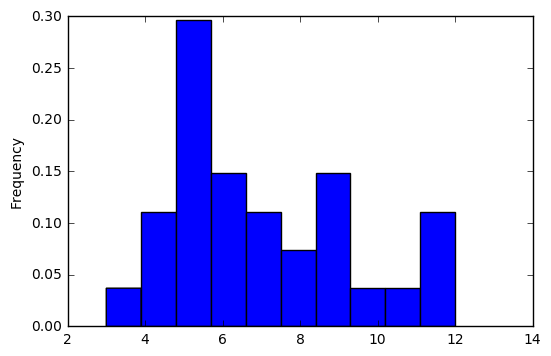

In [26]:
sme_d_pts['ap'].plot(kind='hist', normed=True)

In [27]:
sme_nd_pts = sme_nd.groupby('tic').count().reset_index()
sme_nd_pts.iloc[:,8:27].head()

,ap,at,ceq,ceql,ch,ebit,ebitda,intan,lt,ni,re,recd,rect,rectr,sale_x,seq,teq,wcap,xint
0,10,10,10,9,2,10,10,10,10,10,10,2,10,10,10,10,10,0,10
1,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0,2,2
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
3,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,0,3,3
4,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1


In [28]:
sme_nd_pts.mean()[7:26]

ap        5.574652
at        5.581988
ceq       5.577770
ceql      5.444424
ch        5.528247
ebit      5.520176
ebitda    5.460382
intan     5.442223
lt        5.572450
ni        5.544204
re        5.475055
recd      3.353448
rect      5.542920
rectr     4.665811
sale_x    5.543287
seq       5.581255
teq       3.361702
wcap      4.420763
xint      4.348129
dtype: float64

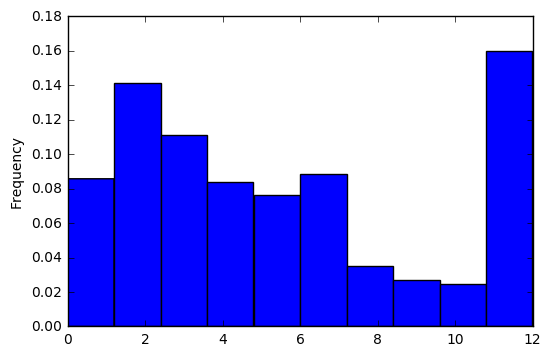

In [29]:
sme_nd_pts['ap'].plot(kind='hist', normed=True)

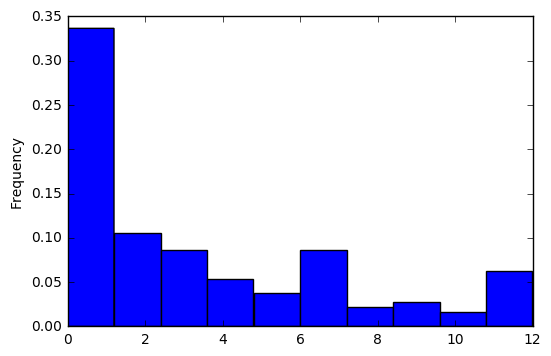

In [30]:
sme_nd_pts['teq'].plot(kind='hist', normed=True)

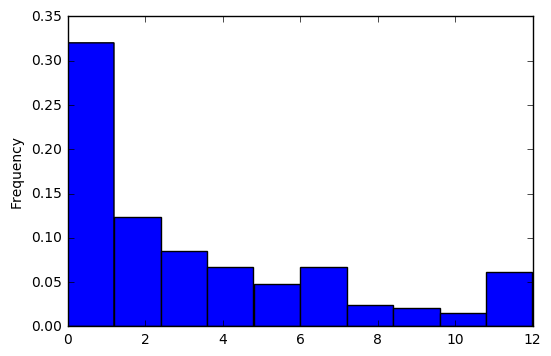

In [31]:
sme_nd_pts['recd'].plot(kind='hist', normed=True)

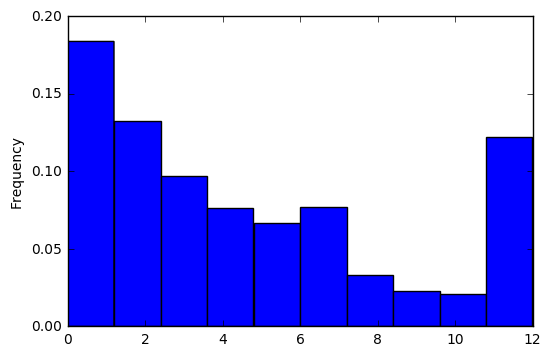

In [32]:
sme_nd_pts['rectr'].plot(kind='hist', normed=True)

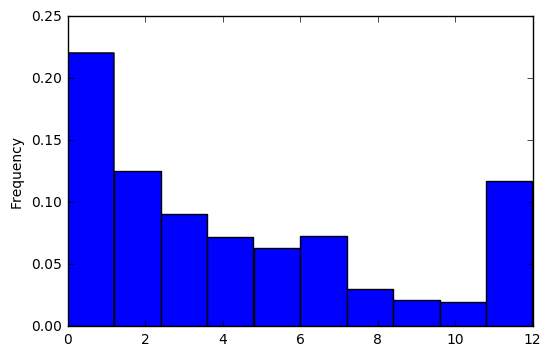

In [33]:
sme_nd_pts['wcap'].plot(kind='hist', normed=True)

In [34]:
# let's drop the recd, teq because of insufficient data pts
sme_data = sme_data.drop(['recd', 'teq'], 1)
sme_d = sme_d.drop(['recd', 'teq'], 1)
sme_nd = sme_nd.drop(['recd', 'teq'], 1)

In [35]:
# filter non defaulting sme with greater than t data points
t = 8
temp_nd = sme_nd_pts[(sme_nd_pts['ap']>t) & (sme_nd_pts['at']>t) & (sme_nd_pts['ceq']>t) & (sme_nd_pts['ceql']>t) &
            (sme_nd_pts['ch']>t) & (sme_nd_pts['ebit']>t) & (sme_nd_pts['ebitda']>t) & (sme_nd_pts['intan']>t) &
            (sme_nd_pts['lt']>t) & (sme_nd_pts['ni']>t) & (sme_nd_pts['re']>t) & (sme_nd_pts['rect']>t) &
            (sme_nd_pts['rectr']>t) & (sme_nd_pts['sale_x']>t) & (sme_nd_pts['seq']>t) & (sme_nd_pts['wcap']>t) &
            (sme_nd_pts['xint']>t)]

#list of good data non defaulting sme
gd_nd = temp_nd['tic'].reset_index().drop('index', 1)
gd_nd.shape

(796, 1)

In [36]:
gd_sme_nd = gd_nd.merge(sme_nd, how='left', left_on='tic', right_on='tic')
gd_sme_nd.shape

(9003, 34)

In [37]:
# filter defaulting sme with greater than t data points
t = 4
temp_d = sme_d_pts[(sme_d_pts['ap']>t) & (sme_d_pts['at']>t) & (sme_d_pts['ceq']>t) & (sme_d_pts['ceql']>t) &
            (sme_d_pts['ch']>t) & (sme_d_pts['ebit']>t) & (sme_d_pts['ebitda']>t) & (sme_d_pts['intan']>t) &
            (sme_d_pts['lt']>t) & (sme_d_pts['ni']>t) & (sme_d_pts['re']>t) & (sme_d_pts['rect']>t) &
            (sme_d_pts['rectr']>t) & (sme_d_pts['sale_x']>t) & (sme_d_pts['seq']>t) & (sme_d_pts['wcap']>t) &
            (sme_d_pts['xint']>t)]

#list of good data non defaulting sme
gd_d = temp_d['tic'].reset_index().drop('index', 1)
gd_d.shape

(23, 1)

In [38]:
# here we get the full data of the defaulting sme
gd_sme_d = gd_d.merge(sme_d, how='left', left_on='tic', right_on='tic')
gd_sme_d.shape

(179, 34)

In [39]:
# lets find the number of defaulting enterprizes per year
gd_sme_ds = gd_sme_d[['fyear', 'tic']]
num_defy = gd_sme_ds.groupby('fyear').count()
num_defy

,tic
fyear,
2003.0,21
2004.0,23
2005.0,23
2006.0,23
2007.0,23
2008.0,17
2009.0,13
2010.0,11
2011.0,11


In [40]:
# how many non-defaulting enterprizes do we need to maintain 
# the 6% national average of default. This will help in stratefied
# sampline later
num_ndefy = num_defy['tic']/0.06
num_ndefy

fyear
2003.0    350.000000
2004.0    383.333333
2005.0    383.333333
2006.0    383.333333
2007.0    383.333333
2008.0    283.333333
2009.0    216.666667
2010.0    183.333333
2011.0    183.333333
2012.0    100.000000
2013.0     83.333333
2014.0     50.000000
Name: tic, dtype: float64

In [41]:
# actual number of non defaulting enterprizes
# we have every year with fuller data i.e. greater
# than 8 data points
gd_sme_nds = gd_sme_nd[['fyear', 'tic']]
gd_sme_nds.groupby('fyear').count()

,tic
fyear,
2003.0,725
2004.0,754
2005.0,777
2006.0,796
2007.0,796
2008.0,796
2009.0,796
2010.0,796
2011.0,796


In [42]:
#lets plot some variables
gd_sme_nd_ap = gd_sme_nd[['tic', 'fyear', 'ap']]
gd_sme_nd_ap.head()

,tic,fyear,ap
0,2151B,2004.0,0.0
1,2151B,2005.0,0.0
2,2151B,2006.0,0.0
3,2151B,2007.0,0.0
4,2151B,2008.0,0.0


In [43]:
gd_sme_nd_apy = gd_sme_nd_ap.set_index(['tic', 'fyear']).unstack('tic')

In [44]:
gd_sme_nd_apy.head()

ap                                                                  \
tic    2151B  2638B  3BETM  3GTHP  3INIS  3NEPH   AACS   AASP   ABMC    ABPI   
fyear                                                                          
2003.0   NaN  0.096  0.448  0.833  0.321  1.416  0.432  0.312  0.737     NaN   
2004.0   0.0  0.074  0.516  0.566  0.329  0.630  0.289  0.199  1.358   6.650   
2005.0   0.0  0.104  0.484  0.683  0.238  0.766  0.324  0.223  1.380   5.520   
2006.0   0.0  0.105  0.789  0.925  0.209  0.568  0.468  0.281  1.091   8.017   
2007.0   0.0  0.122  1.056  0.786  0.442  0.488  0.507  0.193  1.403  13.202   

        ...                                                                   \
tic     ...      XPL   XSPY   XWES   YORW   YTEN   ZAAP   ZIOP   ZIXI   ZLCS   
fyear   ...                                                                    
2003.0  ...    0.053  2.032    NaN  1.743    NaN  0.538    NaN  3.738  0.965   
2004.0  ...    0.142  2.244  0.241  1.798  1.495  0.150    NaN  1.234  1.701   
2005.0  ...    0.069  1.643  0.184  2.641  1.299  0.189  0.836  1.313  1.230   
2006.0  ...    0.163  6.418  0.989  1.627  1.604  0.250  0.776  0.221  4.489   
2007.0  ...    0.195  6.715  0.980  3.164  0.299  0.128  2.909  0.231  1.964   

               
tic      ZYXI  
fyear          
2003.0  0.010  
2004.0  0.180  
2005.0  0.282  
2006.0  0.342  
2007.0  0.817  

[5 rows x 796 columns]

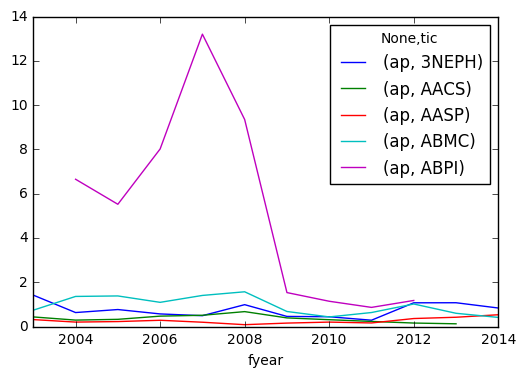

In [45]:
# plot accounts payable for a random range of sme
gd_sme_nd_apy.iloc[:,5:10].plot()

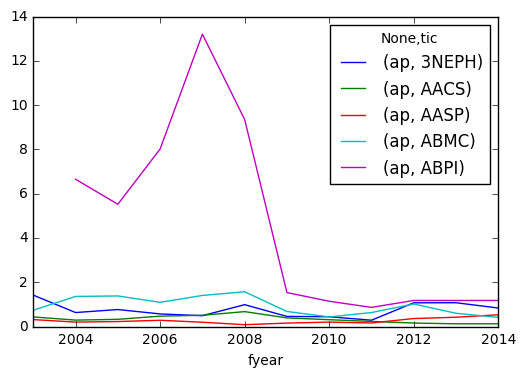

In [46]:
# now plot with interpolation
gd_sme_nd_apy.iloc[:,5:10].interpolate().plot()

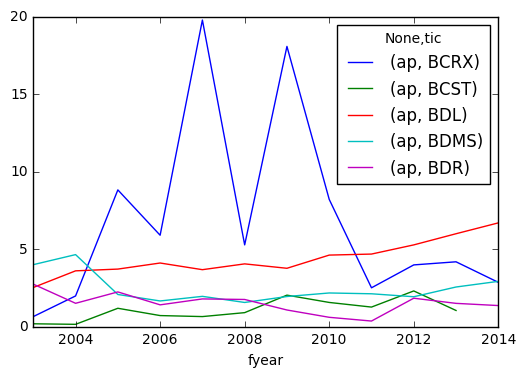

In [47]:
# plot another random range
gd_sme_nd_apy.iloc[:,100:105].plot()

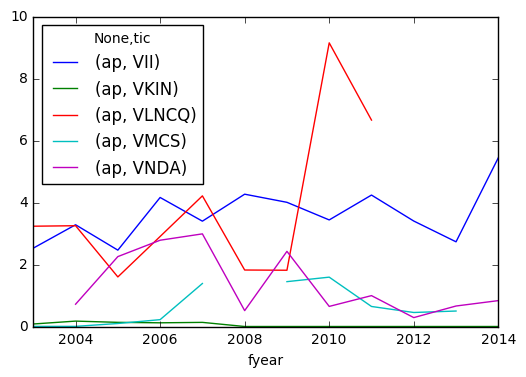

In [48]:
# plot still another random range
gd_sme_nd_apy.iloc[:,748:753].plot()

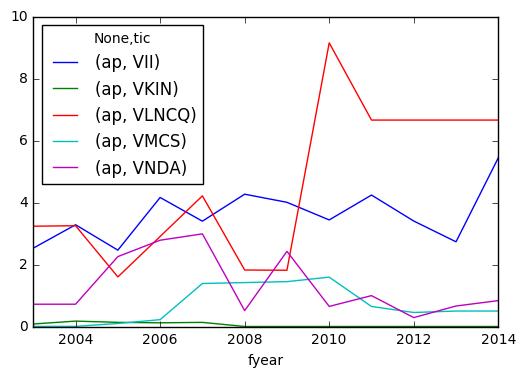

In [49]:
# interpolate this in both directions
gd_sme_nd_apy.iloc[:,748:753].interpolate(limit=3, limit_direction='both').plot()

In [50]:
# prepare the entire dataframe for such interpolation
# first sort the data
gd_sme_nd = gd_sme_nd.sort_values(by=['tic', 'fyear'])
gd_sme_nd.head()

,tic,gvkey,datadate,fyear,indfmt,conm,curcd,fyr,ap,at,...,xint,costat,fic,addzip,city,dlrsn,fyrc,state,dldte,default
0,2151B,259954,20041231,2004.0,INDL,CALIF PETROLEUM TRANSPORT CP,USD,12.0,0.0,127.483,...,10.865,A,USA,10036,New York,NaN,12,NY,NaN,0.0
1,2151B,259954,20051231,2005.0,INDL,CALIF PETROLEUM TRANSPORT CP,USD,12.0,0.0,112.905,...,9.771,A,USA,10036,New York,NaN,12,NY,NaN,0.0
2,2151B,259954,20061231,2006.0,INDL,CALIF PETROLEUM TRANSPORT CP,USD,12.0,0.0,100.625,...,8.729,A,USA,10036,New York,NaN,12,NY,NaN,0.0
3,2151B,259954,20071231,2007.0,INDL,CALIF PETROLEUM TRANSPORT CP,USD,12.0,0.0,89.470,...,7.779,A,USA,10036,New York,NaN,12,NY,NaN,0.0
4,2151B,259954,20081231,2008.0,INDL,CALIF PETROLEUM TRANSPORT CP,USD,12.0,0.0,79.686,...,6.937,A,USA,10036,New York,NaN,12,NY,NaN,0.0


In [51]:
#unstack tic interpolate and stack tic back again
gd_sme_nd_clean = gd_sme_nd.set_index(['tic', 'fyear']).iloc[:,6:23].unstack('tic').interpolate(limit=3, limit_direction='both')
gd_sme_nd_clean = gd_sme_nd_clean.stack('tic')

In [52]:
# here we have a completed and clean dataframe
gd_sme_nd_clean = gd_sme_nd_clean.reset_index()

In [53]:
# sort the clean dataframe and get new index
gd_sme_nd_clean = gd_sme_nd_clean.sort_values(by=['tic', 'fyear']).reset_index().drop('index',1)
gd_sme_nd_clean.head()

,fyear,tic,ap,at,ceq,ceql,ch,ebit,ebitda,intan,lt,ni,re,rect,rectr,sale_x,seq,wcap,xint
0,2003.0,2151B,0.0,127.483,0.001,0.001,0.001,-0.057,-0.057,0.0,127.482,0.0,0.0,16.917,0.0,0.0,0.001,0.001,10.865
1,2004.0,2151B,0.0,127.483,0.001,0.001,0.001,-0.057,-0.057,0.0,127.482,0.0,0.0,16.917,0.0,0.0,0.001,0.001,10.865
2,2005.0,2151B,0.0,112.905,0.001,0.001,0.001,-0.022,-0.022,0.0,112.904,0.0,0.0,14.405,0.0,0.0,0.001,0.001,9.771
3,2006.0,2151B,0.0,100.625,0.001,0.001,0.001,-0.069,-0.069,0.0,100.624,0.0,0.0,12.194,0.0,0.0,0.001,0.001,8.729
4,2007.0,2151B,0.0,89.470,0.001,0.001,0.001,-0.097,-0.097,0.0,89.469,0.0,0.0,11.390,0.0,0.0,0.001,0.001,7.779


In [54]:
# we had interpolated the floating point variables
# now merge the floating point data with the rest of the
# data to create a full clean dataframe
gd_sme_nd_cl_full = pd.concat([gd_sme_nd.iloc[:,0:6], gd_sme_nd_clean.iloc[:, 2:19], gd_sme_nd.iloc[:,23:]], axis=1)
gd_sme_nd_cl_full.head()

,tic,gvkey,datadate,fyear,indfmt,conm,ap,at,ceq,ceql,...,xint,costat,fic,addzip,city,dlrsn,fyrc,state,dldte,default
0,2151B,259954.0,20041231.0,2004.0,INDL,CALIF PETROLEUM TRANSPORT CP,0.0,127.483,0.001,0.001,...,10.865,A,USA,10036,New York,NaN,12.0,NY,NaN,0.0
1,2151B,259954.0,20051231.0,2005.0,INDL,CALIF PETROLEUM TRANSPORT CP,0.0,127.483,0.001,0.001,...,9.771,A,USA,10036,New York,NaN,12.0,NY,NaN,0.0
2,2151B,259954.0,20061231.0,2006.0,INDL,CALIF PETROLEUM TRANSPORT CP,0.0,112.905,0.001,0.001,...,8.729,A,USA,10036,New York,NaN,12.0,NY,NaN,0.0
3,2151B,259954.0,20071231.0,2007.0,INDL,CALIF PETROLEUM TRANSPORT CP,0.0,100.625,0.001,0.001,...,7.779,A,USA,10036,New York,NaN,12.0,NY,NaN,0.0
4,2151B,259954.0,20081231.0,2008.0,INDL,CALIF PETROLEUM TRANSPORT CP,0.0,89.470,0.001,0.001,...,6.937,A,USA,10036,New York,NaN,12.0,NY,NaN,0.0


In [55]:
# let's plot some variables from the defaulting
# dataset
gd_sme_d_ap = gd_sme_d[['tic', 'fyear', 'ap']]
gd_sme_d_ap.head()
gd_sme_d.shape

(179, 34)

In [56]:
# get accounts payable for defaulting enterprizes
gd_sme_d_apy = gd_sme_d_ap.set_index(['tic', 'fyear']).unstack('tic')

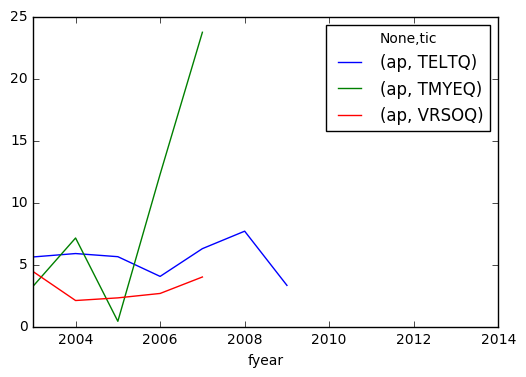

In [57]:
# plot a random range of sme
gd_sme_d_apy.iloc[:,20:25].plot()

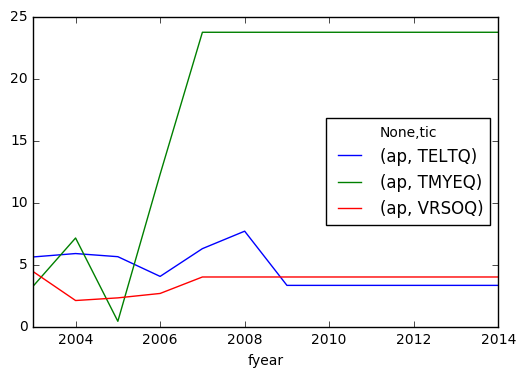

In [58]:
# plot with interpolation
gd_sme_d_apy.iloc[:,20:25].interpolate().plot()

In [59]:
# we realize that interpolating a defaulting enterprize
# after its default is not prudent

gd_sme_d_bd = gd_sme_d[['tic', 'fyear', 'dldte']]
gd_sme_d_bdy = gd_sme_d_bd.set_index(['tic', 'fyear']).unstack('tic')

In [60]:
gd_sme_d_bdy.iloc[:,5:10]

dldte                                                
tic          BMERQ       CANRQ       CBNRQ         CFW       DUNRQ
fyear                                                             
2003.0  20160404.0  20100111.0  20160301.0         NaN  20151001.0
2004.0  20160404.0  20100111.0  20160301.0  20120803.0  20151001.0
2005.0  20160404.0  20100111.0  20160301.0  20120803.0  20151001.0
2006.0  20160404.0  20100111.0  20160301.0  20120803.0  20151001.0
2007.0  20160404.0  20100111.0  20160301.0  20120803.0  20151001.0
2008.0  20160404.0         NaN  20160301.0  20120803.0  20151001.0
2009.0  20160404.0         NaN  20160301.0  20120803.0  20151001.0
2010.0  20160404.0         NaN  20160301.0  20120803.0  20151001.0
2011.0  20160404.0         NaN  20160301.0  20120803.0  20151001.0
2012.0  20160404.0         NaN  20160301.0         NaN  20151001.0
2013.0  20160404.0         NaN  20160301.0         NaN  20151001.0
2014.0  20160404.0         NaN  20160301.0         NaN         NaN

In [61]:
gd_sme_d.iloc[:,8:25].head(1)

,ap,at,ceq,ceql,ch,ebit,ebitda,intan,lt,ni,re,rect,rectr,sale_x,seq,wcap,xint
0,0.0,5.007,5.007,5.007,0.001,-0.129,-0.129,0.0,0.0,-0.129,-1.04,0.0,0.0,0.0,5.007,0.001,0.0


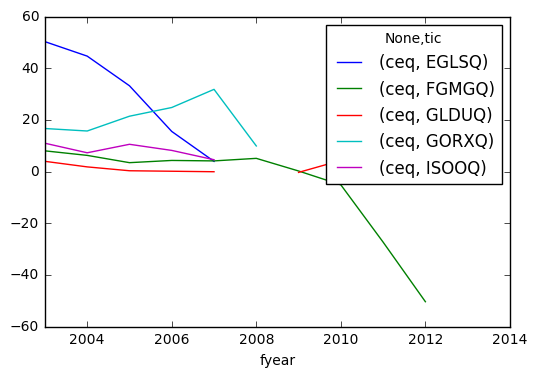

In [62]:
# let's now plot some additional variables
var = 'ceq'
c1 = 10
c2 = 15
gd_sme_d_v = gd_sme_d[['tic', 'fyear', var]]
gd_sme_d_vy = gd_sme_d_v.set_index(['tic', 'fyear']).unstack('tic')
gd_sme_d_vy.iloc[:,c1:c2].plot()

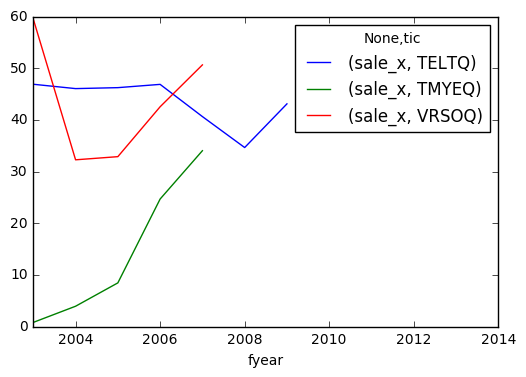

In [63]:
var = 'sale_x'
c1 = 20
c2 = 25
gd_sme_d_v = gd_sme_d[['tic', 'fyear', var]]
gd_sme_d_vy = gd_sme_d_v.set_index(['tic', 'fyear']).unstack('tic')
gd_sme_d_vy.iloc[:,c1:c2].plot()

In [64]:
# the desired number of samples from non defaulting enterprizes
num_ndefy

fyear
2003.0    350.000000
2004.0    383.333333
2005.0    383.333333
2006.0    383.333333
2007.0    383.333333
2008.0    283.333333
2009.0    216.666667
2010.0    183.333333
2011.0    183.333333
2012.0    100.000000
2013.0     83.333333
2014.0     50.000000
Name: tic, dtype: float64

In [65]:
#total number of desired samples across all financial years
num_ndefy.sum()

2983.333333333334

In [66]:
# how to subset series index
num_ndefy.index[0]

2003.0

In [67]:
# how to subset series values
int(num_ndefy.values[0])

350

In [68]:
# how to sample from a particular financial year
i=0
gd_sme_nd[gd_sme_nd['fyear']==num_ndefy.index[i]].sample(n=int(num_ndefy.values[i]), axis=0).shape

(350, 34)

In [69]:
# sampling from each fyear and putting the samples in a list
sample_df = []
for i,ind in enumerate(num_ndefy.index):
    sample_df.append(gd_sme_nd[gd_sme_nd['fyear']==num_ndefy.index[i]].sample(n=int(num_ndefy.values[i]), axis=0))

In [70]:
# concatenate samples to create the shape
# this dataframe now has the needed number of non-defaulting 
# enterprizes to maintain the 6% default average
gd_sme_nd_strat = pd.concat(sample_df)
gd_sme_nd_strat.shape

(2980, 34)

In [71]:
gd_sme_clean_strat = pd.concat([gd_sme_nd_strat, gd_sme_d])
gd_sme_clean_strat = gd_sme_clean_strat.sort_values(by=['tic', 'fyear'])

In [72]:
# this is our final clean, full, stratefied sampled dataframe
gd_sme_clean_strat.head()

,tic,gvkey,datadate,fyear,indfmt,conm,curcd,fyr,ap,at,...,xint,costat,fic,addzip,city,dlrsn,fyrc,state,dldte,default
2,2151B,259954,20061231,2006.0,INDL,CALIF PETROLEUM TRANSPORT CP,USD,12.0,0.000,100.625,...,8.729,A,USA,10036,New York,NaN,12,NY,NaN,0.0
14,2638B,8613,20070930,2007.0,INDL,PISMO COAST VILLAGE INC,USD,9.0,0.122,11.926,...,0.189,A,USA,93449,Pismo Beach,NaN,9,CA,NaN,0.0
16,2638B,8613,20090930,2009.0,INDL,PISMO COAST VILLAGE INC,USD,9.0,0.181,15.814,...,0.265,A,USA,93449,Pismo Beach,NaN,9,CA,NaN,0.0
17,2638B,8613,20100930,2010.0,INDL,PISMO COAST VILLAGE INC,USD,9.0,0.162,15.985,...,0.261,A,USA,93449,Pismo Beach,NaN,9,CA,NaN,0.0
0,3AMBEQ,1367,20030630,2003.0,INDL,AMBER RESOURCES CO OF COLO,USD,6.0,0.000,5.007,...,0.000,I,USA,80202,Denver,2.0,12,CO,20120831.0,1.0


In [73]:
gd_sme_clean_strat.shape

(3159, 34)

In [74]:
fdd2 = gd_sme_clean_strat[['fyear', 'tic', 'default']].groupby(['fyear', 'default'])['tic'].count().reset_index()
fdd2 = fdd2.set_index(['fyear', 'default'])
fdd2 = fdd2.unstack('default')
fdd2.columns = fdd2.columns.droplevel(0)
fdd2['ratio_pct'] = fdd2.iloc[:,1] / fdd2.iloc[:,0] * 100
fdd2.head()

default,0.0,1.0,ratio_pct
fyear,,,
2003.0,350,21,6.000000
2004.0,383,23,6.005222
2005.0,383,23,6.005222
2006.0,383,23,6.005222
2007.0,383,23,6.005222


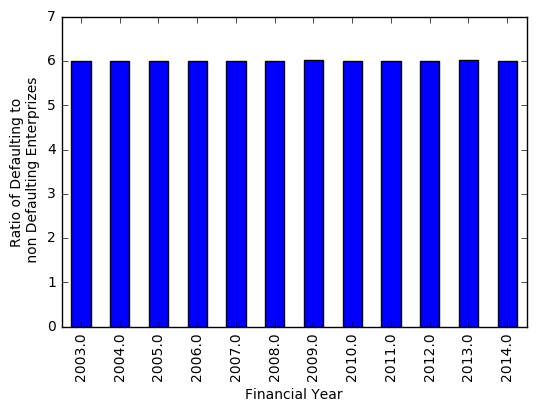

In [75]:
bx = fdd2['ratio_pct'].plot(kind='bar')
bx.set_ylabel('Ratio of Defaulting to\n non Defaulting Enterprizes')
bx.set_xlabel('Financial Year')